# Analysis 3: How Bill Positions Differ Across Subjects.

In [1]:
import os
import matplotlib.pyplot as plt
from utils import open_csv, save_csv

##### Load the client-bill-label-level df with bill information

In [2]:
df = open_csv('analysis_input/analysis3_4_client_bill_label_bill_info_df.csv')

## Bill Position Ratios Across Different Bill Subjects.

In [3]:
def get_bill_label_prop_by_bill_subject_vertical(df):
    bill_label_counts = df.groupby(['bill_id', 'label_name','subjects_top_term']).size().reset_index(name='count')
    bill_total_count = bill_label_counts.groupby(['bill_id','subjects_top_term'])['count'].transform('sum')
    bill_label_counts['all_count'] = bill_total_count
    bill_label_counts['ratio'] = bill_label_counts['count'] / bill_total_count

    bill_count = bill_label_counts.groupby(['subjects_top_term'])['bill_id'].nunique()
    average_ratios = bill_label_counts.groupby(['subjects_top_term', 'label_name'])['ratio'].sum()
    average_ratios_per_bill = average_ratios / bill_count
    average_ratios_per_bill = average_ratios_per_bill.unstack()
    average_ratios_per_bill['unique_bill_count'] = bill_count

    lobby_count_per_subject = df.groupby(['subjects_top_term', 'bill_id'])['lob_id'].nunique()
    avg_lobby_count_per_bill = lobby_count_per_subject.groupby('subjects_top_term').mean()
    average_ratios_per_bill['avg_lobby_count_per_bill'] = avg_lobby_count_per_bill

    average_ratios_per_bill = average_ratios_per_bill[['unique_bill_count', 'avg_lobby_count_per_bill', 'Support', 'Oppose', 'Engage']]
    bill_count_sorted = bill_count.sort_values(ascending=False)
    top_N = 15
    top_subjects = bill_count_sorted.head(top_N).index
    average_ratios_per_bill = average_ratios_per_bill.loc[top_subjects]
    ordered_subjects = average_ratios_per_bill.sort_values(by=['Support', 'Oppose'], ascending=[True, True]).reset_index()['subjects_top_term']
    average_ratios_per_bill = average_ratios_per_bill.loc[ordered_subjects]

    color_dict = {
        'Support': '#01897b',
        'Oppose': '#e6447b',
        'Engage': '#969696'
    }
    
    colors = [color_dict[label] for label in ['Support', 'Oppose', 'Engage']]

    # Create horizontal stacked bar chart
    fig, ax = plt.subplots(figsize=(9, 7))
    bar_data = average_ratios_per_bill[['Support', 'Oppose', 'Engage']]
    bar_plot = bar_data.plot(kind='barh', stacked=True, ax=ax, color=colors, legend=False, width=0.6)

    # Add subject labels inside the bar (left side)
    for i, subject in enumerate(average_ratios_per_bill.index):
        support_width = average_ratios_per_bill.loc[subject, 'Support']
        ax.text(0.01, i, subject, va='center', ha='left', fontsize=12, color='white', clip_on=True, weight='bold')

    # Hide y-axis ticks and label
    ax.set_yticks([])
    ax.set_yticklabels([])

    # Remove top and right spines for cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_xlabel('Bill Position Ratio', fontsize=16)
    ax.set_ylabel('')
    ax.set_xlim(0, 1.0)

    # Custom legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['Support', 'Oppose', 'Engage'], title='Bill Position', title_fontsize=15, fontsize=14,
              bbox_to_anchor=(1.01, 0.5), loc='center left')

    plt.xticks(fontsize=13)
    plt.tight_layout()
    os.makedirs('result', exist_ok=True)
    plt.savefig(f'analysis_output/analysis3_fig4.pdf', format='pdf')
    plt.show()

    average_ratios_per_bill.sort_values(by='Support', ascending=False).reset_index().to_csv(\
        f'analysis_output/analysis3_table21_appendix.csv', index=False)




## Fig. 4. Bill Position Ratios Across Different Bill Subjects. 

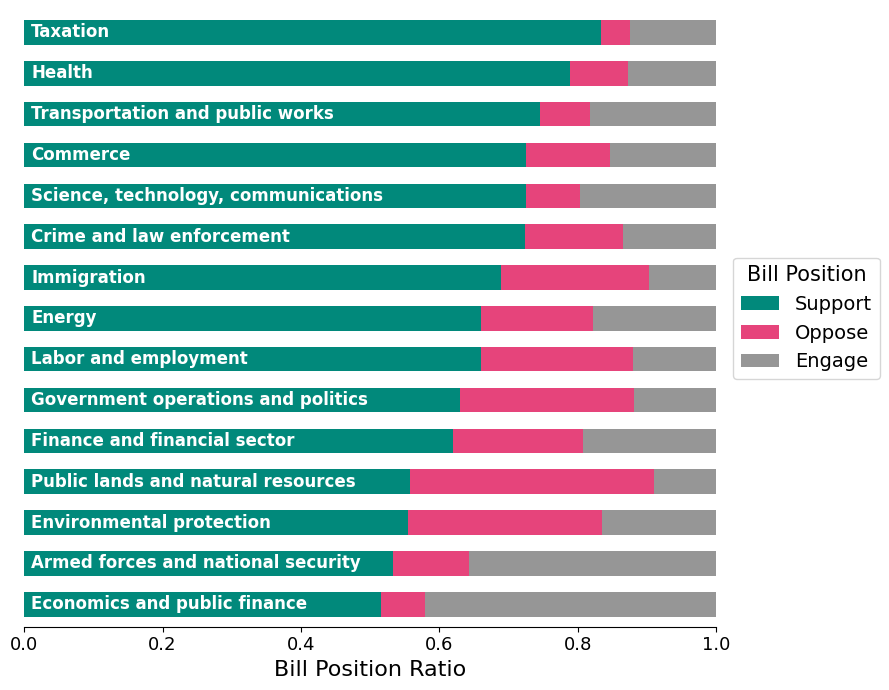

In [4]:
get_bill_label_prop_by_bill_subject_vertical(df)